# Availability and Performance


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import set_config

In [3]:
dir_local = set_config.ConfigSectionMap("SectionOne")['local']
dir_sanofi_share = set_config.ConfigSectionMap("SectionOne")['sanofi']
dir_race = set_config.ConfigSectionMap("SectionOne")['race']

print ("dir_sanofi_share is %s" % (dir_sanofi_share))
print ("dir_local is %s" % (dir_local))
print ("dir_race is %s" % (dir_race))

dir_sanofi_share is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Frankfurt sprint/SFD/
dir_local is C:/Users/mark_/Documents/McLaren2021/Sanofi/
dir_race is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Race Dashboard data


In [4]:
filename = 'oee_extracts_all_sites.xlsx'
path = os.path.join(dir_local, filename)
df = pd.read_excel(path, na_values=('-'))

In [5]:
df.dropna(subset={'Week'}, inplace=True)
df[['OEE %','Changeover','Availability %','Performance %']] = df[['OEE %','Changeover','Availability %','Performance %']].mul(100)

In [6]:
df['WeekOfYear'] = pd.to_numeric(df['Week'].str[1:3])
df['Year'] = pd.to_numeric(df['Week'].str[4:])
dates = df.Year*100+df.WeekOfYear
df['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')
df.head()

,Week,Line,OEE %,Changeover,Unplanned_tech_loss,Availability %,Performance %,WeekOfYear,Year,Date
24,W01-2020,LSX - 1030 Packaging Line,51.963834,6.991830,0.211838,71.102124,73.083378,1,2020,2020-01-12
25,W01-2020,LSX - 1070-1 Packaging Line,35.919900,6.247921,0.470711,47.417234,76.242102,1,2020,2020-01-12
26,W01-2020,LSX - 1070-2 Packaging Line,3.129890,0.000000,0.000000,100.000000,3.129890,1,2020,2020-01-12
27,W01-2020,LSX - C65-1 Packaging Line,39.046651,13.997290,0.296680,60.164860,64.967799,1,2020,2020-01-12
28,W01-2020,LSX - C65-2 Packaging Line,15.830116,8.909910,0.137793,70.655405,22.404678,1,2020,2020-01-12


In [7]:
df.dropna(subset=['WeekOfYear'], inplace=True)
df

,Week,Line,OEE %,Changeover,Unplanned_tech_loss,Availability %,Performance %,WeekOfYear,Year,Date
24,W01-2020,LSX - 1030 Packaging Line,51.963834,6.991830,0.211838,71.102124,73.083378,1,2020,2020-01-12
25,W01-2020,LSX - 1070-1 Packaging Line,35.919900,6.247921,0.470711,47.417234,76.242102,1,2020,2020-01-12
26,W01-2020,LSX - 1070-2 Packaging Line,3.129890,0.000000,0.000000,100.000000,3.129890,1,2020,2020-01-12
27,W01-2020,LSX - C65-1 Packaging Line,39.046651,13.997290,0.296680,60.164860,64.967799,1,2020,2020-01-12
28,W01-2020,LSX - C65-2 Packaging Line,15.830116,8.909910,0.137793,70.655405,22.404678,1,2020,2020-01-12
...,...,...,...,...,...,...,...,...,...,...
8935,W53-2020,TRS - L19 Packaging Line,NaN,NaN,NaN,NaN,NaN,53,2020,2021-01-10
8936,W53-2020,TRS - L21 Packaging Line,NaN,NaN,NaN,NaN,NaN,53,2020,2021-01-10
8937,W53-2020,TRS - L22 Packaging Line,NaN,NaN,NaN,NaN,NaN,53,2020,2021-01-10
8938,W53-2020,TRS - L24 Packaging Line,NaN,NaN,NaN,NaN,NaN,53,2020,2021-01-10


In [8]:
df.set_index('Date', inplace=True)

In [9]:
df.sort_index(inplace=True)

In [10]:
rolling_avg = df.groupby('Line')[['OEE %','Performance %','Availability %']].rolling(window=4).mean().reset_index()

In [11]:
# keep the data after this start date
start_date = '2021-04-01'

rolling_avg = rolling_avg[rolling_avg.Date >= start_date]


In [12]:
print ("Number of Unique Plants/Factories: {}".format(len(rolling_avg.Line.str[:3].unique())))
print ("Number of Unique Lines: {}".format(len(rolling_avg.Line.unique())))
print ("Number of Unique Lines recording OEE % values: {}".format(len(rolling_avg[rolling_avg['OEE %'] > 0].Line.unique())))

Number of Unique Plants/Factories: 19
Number of Unique Lines: 234
Number of Unique Lines recording OEE % values: 197


In [13]:
#  create a Plant column from first 3 chars of Line - will do properly later
rolling_avg['Plant'] = rolling_avg.Line.str[:3]
rolling_avg

,Line,Date,OEE %,Performance %,Availability %,Plant
0,ANA - Fiale 6,2021-12-12,NaN,NaN,NaN,ANA
1,ELB - Extraction B12 1st cycle,2021-06-06,NaN,NaN,NaN,ELB
2,ELB - Extraction B12 1st cycle,2021-06-13,NaN,NaN,NaN,ELB
3,ELB - Extraction B12 1st cycle,2021-06-20,NaN,NaN,NaN,ELB
4,ELB - Extraction B12 1st cycle,2021-06-27,92.899428,92.899428,100.000000,ELB
...,...,...,...,...,...,...
8911,WAT - LYO Packaging Line 9,2021-11-28,26.462903,126.347437,22.711537,WAT
8912,WAT - LYO Packaging Line 9,2021-12-05,30.637254,164.660714,20.307421,WAT
8913,WAT - LYO Packaging Line 9,2021-12-12,33.505064,156.210188,23.726560,WAT
8914,WAT - PFS Filling Line,2021-12-05,NaN,NaN,NaN,WAT


In [14]:
race_site_list = [
'SCO - IMA C80/2',
'SCO - GAMMA1',
'MAF - C9 Packaging Line',
'FRA - Devices Pens, AL6',
'MAF - C2 Packaging Line',
'FRA - Devices Pens, AL5 Packaging 1',
'SUZ - LINE 01 - UHLMANN 1880',
'FRA - FF NLP, M22 Filling',
'TRS - L18 Packaging Line',
'SUZ - MEDISEAL PURAN',
'FRA - FF NLP, M21 Filling',
'TRS - L25 Packaging Line',
'LLB - IMA-2 Packaging (SOLD)',
'FRA - FF NLP, M18 Filling',
'LLB - Bosch-2 Packaging (SOLD)',
'LTR - C5 Packaging Line',
'LSX - SUPPO Packaging Line',
'LSX - TR200 Packaging Line'
]

In [15]:
rolling_avg = rolling_avg[rolling_avg.Line.isin(race_site_list)]

In [16]:
x = rolling_avg['Date']
y1 = rolling_avg['Availability %']
y2 = rolling_avg['Performance %']
y3 = rolling_avg['OEE %']

fig = go.Figure()

# add traces
fig.add_trace(go.Scatter(x=x, y=y1
    , mode='markers'
    , name='Availability %'))
fig.add_trace(go.Scatter(x=x, y=y2
    , mode='markers'
    , name='Performance %'))
fig.add_trace(go.Scatter(x=x, y=y3
    , mode='lines'
    , name='OEE %'))

fig.update_layout(title='Availability vs Performance during race')
fig.show()

Availability %


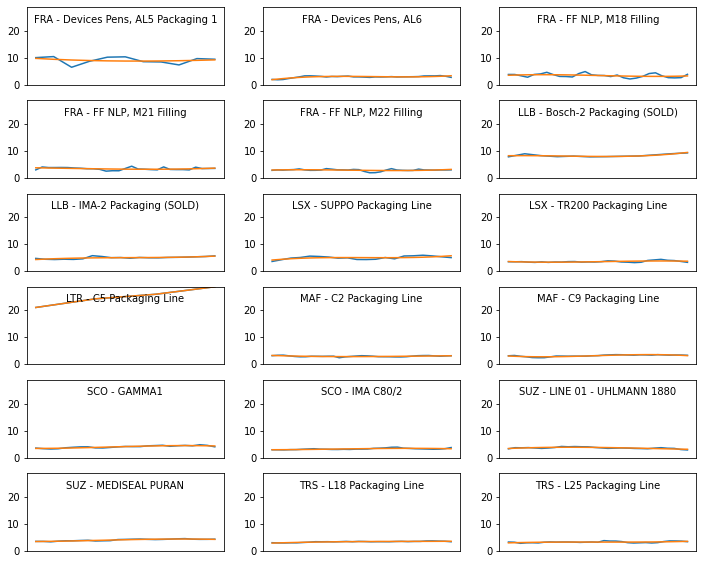

Performance %


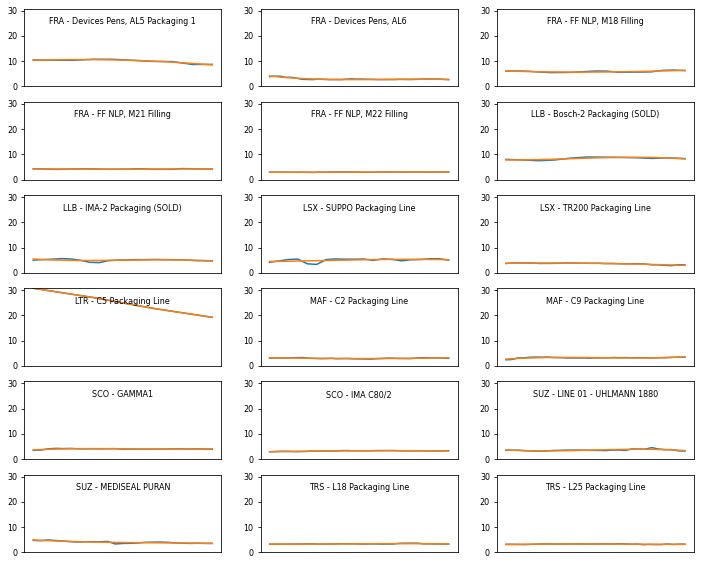

In [17]:
metrics = ['Availability %','Performance %']

d = {}

myDict={}
df_poly = pd.DataFrame()

for metric in metrics:

    ymax = 0

    for line in rolling_avg.Line.unique():
        y = rolling_avg[rolling_avg.Line == line][metric].dropna() / rolling_avg[rolling_avg.Line == line][metric].dropna().sum() * 100
        if max(y) > ymax:
            ymax = max(y)

    fig, axs = plt.subplots(int(len(rolling_avg.Line.unique())/3) + (len(rolling_avg.Line.unique()) % 3>0),3, figsize=(12,10))

    i=0
    j=0

    for line in rolling_avg.Line.unique():
        y = rolling_avg[rolling_avg.Line == line][metric].dropna() / rolling_avg[rolling_avg.Line == line][metric].dropna().sum() * 100
        x = np.arange(len(y))
        z = np.polyfit(x, y, 3)
        p = np.poly1d(z)

        axs[i,j].plot(x, y)
        axs[i,j].plot(x,p(x))
        axs[i,j].axes.get_xaxis().set_visible(False)
        axs[i,j].text(0.5, 0.8, line, transform=axs[i,j].transAxes, ha="center")
        axs[i,j].set_ylim(0,ymax)

        if j<2:
            j+=1
        else:
            i+=1
            j=0

        d[metric, line] = round(p(x[-1])-p(x[0]),0)
        myDict = {
            'metric': metric,
            'line': line,
            'start': [p(x[0])],
            'finish': [p(x[-1])],
        }


        df_poly = df_poly.append(pd.DataFrame(myDict))
    print (metric)
    plt.rcParams.update({'font.size': 8})
    plt.show()

Text(0.5, 1.0, 'Start and Finish Availability/Performance during Race')

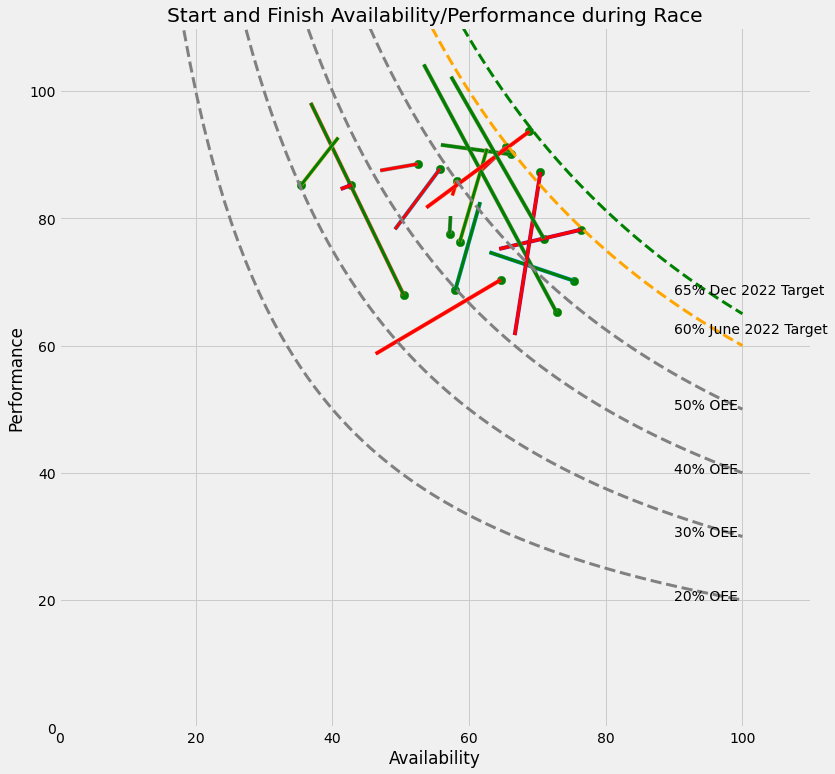

In [74]:
def oee_line(x, target):
    y = (target/x)
    return y

first = rolling_avg.groupby('Line').first().reset_index()
last = rolling_avg.groupby('Line').last().reset_index()

data = first.append(last)

plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,12))

# plt.scatter(x=first['Availability %'], y=first['Performance %'])
plt.scatter(x=last['Availability %'], y=last['Performance %'], c='green', s=70)

for line in data.Line.unique():
    plt.plot(data[data.Line == line]['Availability %'], data[data.Line == line]['Performance %'])

    x = np.array(data[data.Line == line]['Availability %'])
    y = np.array(data[data.Line == line]['Performance %'])
    z = np.array(np.rad2deg([np.arctan2(y[-1] - y[0], x[-1] - x[0])]))
    # z = np.cos(0.5 * (x[:-1] + x[1:]))
    # c = np.array(data[data.Line == line]['OEE %'])
    # plt.plot(x, y, c=c, marker='_', cmap='gray')

    cmap = ListedColormap(['g', 'b', 'r'])
    norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the line collection object, setting the colormapping parameters.
# Have to set the actual values used for colormapping separately.
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(z)
    lc.set_linewidth(3)

    plt.gca().add_collection(lc)
    plt.xlim(x.min(), x.max())
    plt.xlim(0,100)
    plt.ylim(0, 100)

plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), 60), c='orange', lw=3, ls='--', label='60% June 2022 Target')
plt.annotate(xy=(90,62), text='60% June 2022 Target')
plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), 65), c='green', lw=3, ls='--', label='65% December 2022 Target')
plt.annotate(xy=(90,68), text='65% Dec 2022 Target')
for pct in [20,30,40,50]:
    plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), pct), c='gray', lw=3, ls='--', label='{}%'.format(pct))
    plt.annotate(xy=(90,pct), text='{}% OEE'.format(pct))
plt.xlim(0,110)
plt.ylim(0,110)
plt.xlabel('Availability')
plt.ylabel('Performance')
plt.title('Start and Finish Availability/Performance during Race')


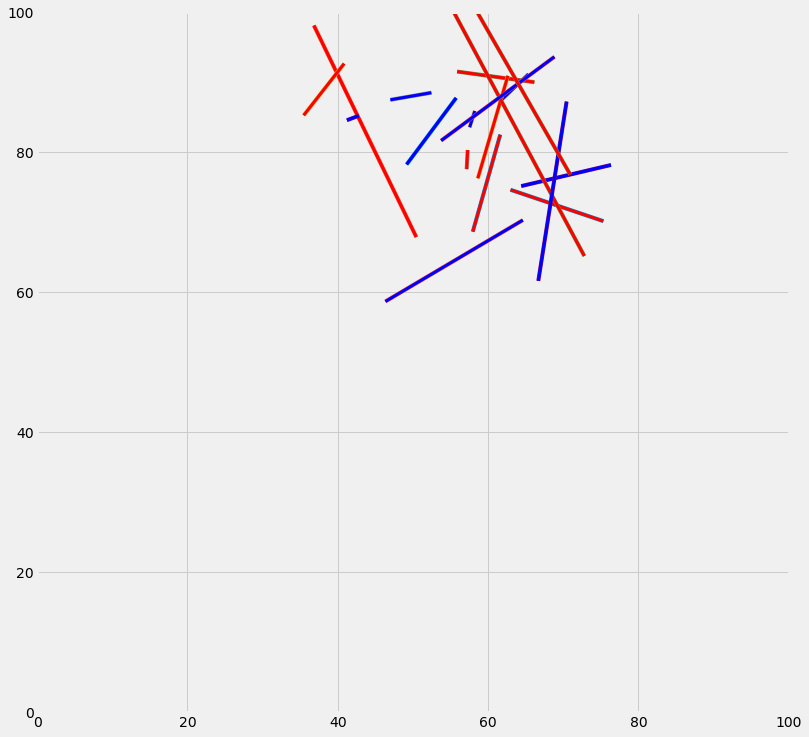

In [40]:
# TRIAL ONE 

from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

def oee_line(x, target):
    y = (target/x)
    return y

first = rolling_avg.groupby('Line').first().reset_index()
last = rolling_avg.groupby('Line').last().reset_index()

data = first.append(last)

plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,12))

# plt.scatter(x=first['Availability %'], y=first['Performance %'])
# plt.scatter(x=last['Availability %'], y=last['Performance %'], c='red', s=70)

for line in data.Line.unique():
    plt.plot(data[data.Line == line]['Availability %'], data[data.Line == line]['Performance %'])

    x = np.array(data[data.Line == line]['Availability %'])
    y = np.array(data[data.Line == line]['Performance %'])
    z = np.array(np.rad2deg([np.arctan2(y[-1] - y[0], x[-1] - x[0])]))
    z = np.array(data[data.Line == line]['OEE %'])
    # z = np.cos(0.5 * (x[:-1] + x[1:]))
    # c = np.array(data[data.Line == line]['OEE %'])
    # plt.plot(x, y, c=c, marker='_', cmap='gray')

    cmap = ListedColormap(['r', 'g', 'b'])
    norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the line collection object, setting the colormapping parameters.
# Have to set the actual values used for colormapping separately.
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(z)
    lc.set_linewidth(3)

# fig1 = plt.figure()
    plt.gca().add_collection(lc)
    plt.xlim(x.min(), x.max())
    plt.xlim(0,100)
    plt.ylim(0, 100)





In [169]:
x = np.array(x)
y = np.array(y)
c = np.array(c)

In [81]:
80.6*80.6/100

64.96359999999999

In [48]:
# np.array(np.rad2deg([np.arctan2(y[-1] - y[0], x[-1] - x[0])]))
np.rad2deg(np.arctan2(y[-1] - y[0], x[-1] - x[0]))

22.10668149278687

In [208]:
#create DataFrame
test = pd.DataFrame({'x': [25, 12, 15, 14, 19, 23, 25, 29],
                   'y': [5, 7, 7, 9, 12, 9, 9, 4],
                   'z': [3, 4, 4, 5, 7, 8, 8, 9]})

#view DataFrame
test

,x,y,z
0,25,5,3
1,12,7,4
2,15,7,4
3,14,9,5
4,19,12,7
5,23,9,8
6,25,9,8
7,29,4,9


In [191]:
for i, color in enumerate(colors):
    print (i, color)

0 (0.0, 0.0, 0.5, 1.0)
1 (0.0, 0.0, 0.5, 1.0)
2 (0.0, 0.0, 0.5, 1.0)
3 (0.0, 0.0, 0.5, 1.0)
4 (0.0, 0.0, 0.517825311942959, 1.0)
5 (0.0, 0.0, 0.517825311942959, 1.0)
6 (0.0, 0.0, 0.517825311942959, 1.0)
7 (0.0, 0.0, 0.517825311942959, 1.0)
8 (0.0, 0.0, 0.535650623885918, 1.0)
9 (0.0, 0.0, 0.535650623885918, 1.0)
10 (0.0, 0.0, 0.535650623885918, 1.0)
11 (0.0, 0.0, 0.535650623885918, 1.0)
12 (0.0, 0.0, 0.553475935828877, 1.0)
13 (0.0, 0.0, 0.553475935828877, 1.0)
14 (0.0, 0.0, 0.553475935828877, 1.0)
15 (0.0, 0.0, 0.553475935828877, 1.0)
16 (0.0, 0.0, 0.571301247771836, 1.0)
17 (0.0, 0.0, 0.571301247771836, 1.0)
18 (0.0, 0.0, 0.571301247771836, 1.0)
19 (0.0, 0.0, 0.571301247771836, 1.0)
20 (0.0, 0.0, 0.589126559714795, 1.0)
21 (0.0, 0.0, 0.589126559714795, 1.0)
22 (0.0, 0.0, 0.589126559714795, 1.0)
23 (0.0, 0.0, 0.589126559714795, 1.0)
24 (0.0, 0.0, 0.606951871657754, 1.0)
25 (0.0, 0.0, 0.606951871657754, 1.0)
26 (0.0, 0.0, 0.606951871657754, 1.0)
27 (0.0, 0.0, 0.606951871657754, 1.0)
28

In [229]:
points

array([[[ 1.        ,  0.        ]],

       [[ 0.98756455,  0.05023011]],

       [[ 0.95056749,  0.10033341]],

       [[ 0.88992896,  0.15018339]],

       [[ 0.8071571 ,  0.19965422]],

       [[ 0.70431053,  0.24862099]],

       [[ 0.58394711,  0.29696008]],

       [[ 0.44906041,  0.34454944]],

       [[ 0.30300518,  0.39126893]],

       [[ 0.14941394,  0.43700061]],

       [[-0.00789337,  0.481629  ]],

       [[-0.16500435,  0.52504145]],

       [[-0.31801154,  0.56712835]],

       [[-0.46310949,  0.60778345]],

       [[-0.59668949,  0.6469041 ]],

       [[-0.71542929,  0.68439153]],

       [[-0.81637572,  0.72015112]],

       [[-0.89701816,  0.75409257]],

       [[-0.95535095,  0.78613019]],

       [[-0.98992331,  0.8161831 ]],

       [[-0.99987539,  0.84417544]],

       [[-0.98495967,  0.87003651]],

       [[-0.94554713,  0.89370105]],

       [[-0.88261798,  0.91510929]],

       [[-0.79773733,  0.9342072 ]],

       [[-0.69301623,  0.95094655]],

       [[-0.